In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


import pickle

In [2]:
df = pd.read_csv("D:/data science/price prediction/Bengaluru_House_Data.csv")
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# print(df['area_type'].unique())
# print(df['availability'].unique())
print(df['location'].unique())



['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [5]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
value_counts = df['location'].value_counts()
value_counts


Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [7]:
value_counts = df['size'].value_counts()
value_counts

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [8]:
df['location'] = df['location'].fillna('Whitefield')
df['size'] = df['size'].fillna('2 BHK')
df['bath'] = df['bath'].fillna(df['bath'].median())

# extract bhk from size
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [9]:
numeric_values = pd.to_numeric(df['total_sqft'], errors='coerce')

non_numeric_values = df['total_sqft'][numeric_values.isna()].tolist()

In [10]:
numeric_values

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [11]:
non_numeric_values

['2100 - 2850',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '34.46Sq. Meter',
 '1195 - 1440',
 '1200 - 2400',
 '4125Perch',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000Sq. Meter',
 '4000 - 5249',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500Sq. Meter',
 '620 - 933',
 '142.61Sq. Meter',
 '2695 - 2940',
 '2000 - 5634',
 '1574Sq. Yards',
 '3450 - 3472',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '361.33Sq. Yards',
 '645 - 936',
 '2710 - 3360',
 '2249.81 - 4112.19',
 '3436 - 3643',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '1200 - 2400',


In [12]:
def convertRange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convertRange)
df.dropna(inplace=True)
df['Price_per_square_feet'] = df['price']*100000 / df['total_sqft']

In [13]:
location_count = df['location'].value_counts()

location_count_less_10 = location_count[location_count<10]

df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

df = df[((df['total_sqft']/df['bhk'])>=300)]


##### Mean-standard deviation refer to --> lower bound 
##### Mean + standard deviation --> refer to upper bound 

This function groups the DataFrame by location, calculates the mean of total_sqft with respect to bhk for each location, filters the data based on lower and upper bounds, and then concatenates the filtered results into a new DataFrame


In [14]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.total_sqft / subdf.bhk)
        st = np.std(subdf.total_sqft / subdf.bhk)

        gen_df = subdf[((subdf.total_sqft / subdf.bhk) > (m - st)) & ((subdf.total_sqft / subdf.bhk) <= (m + st))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output

df = remove_outliers_sqft(df)

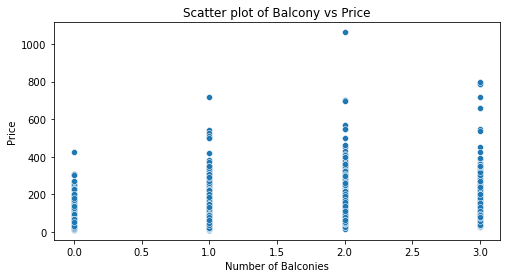

In [15]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='balcony', y='price')
plt.title('Scatter plot of Balcony vs Price')
plt.xlabel('Number of Balconies')
plt.ylabel('Price')
plt.show()

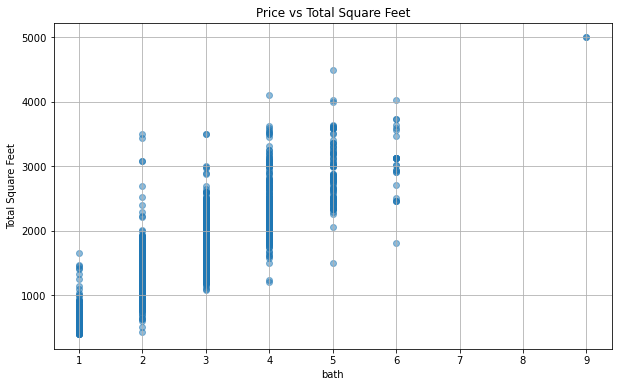

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['total_sqft'], alpha=0.5)
plt.title('Price vs Total Square Feet')
plt.xlabel('bath')
plt.ylabel('Total Square Feet')
plt.grid(True);

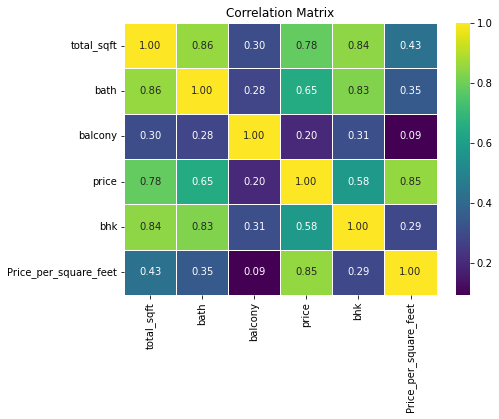

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
df.drop(columns=['society' , 'availability' ,'area_type' , 'balcony' ,'size'] , inplace=True)


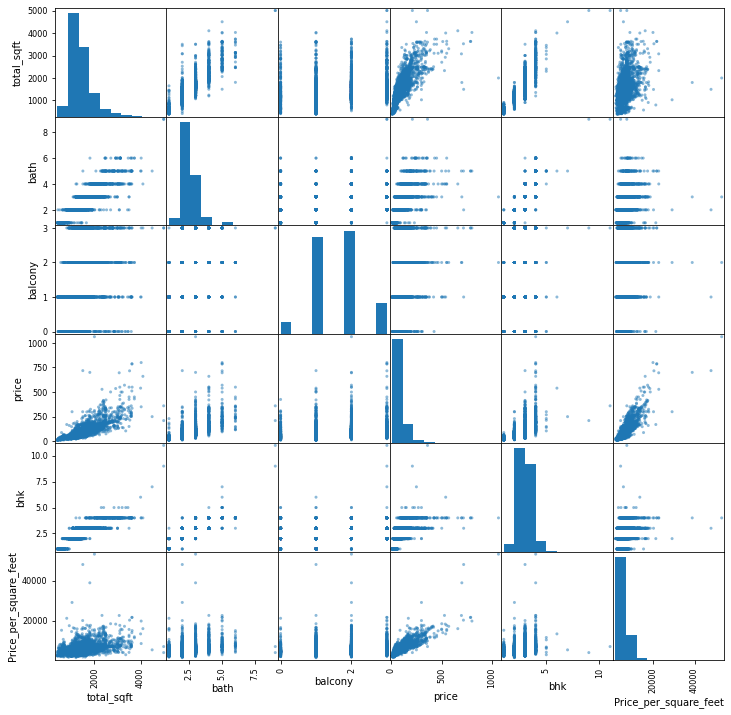

In [19]:
pd.plotting.scatter_matrix(numeric_df, figsize=(12, 12))
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor


In [21]:
df

,location,total_sqft,bath,price,bhk,Price_per_square_feet
0,1st Phase JP Nagar,2825.0,4.0,250.00,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.00,3,8906.666667
2,1st Phase JP Nagar,2065.0,4.0,210.00,3,10169.491525
3,1st Phase JP Nagar,2059.0,3.0,225.00,3,10927.634774
4,1st Phase JP Nagar,1394.0,2.0,100.00,2,7173.601148
...,...,...,...,...,...,...
5808,other,1000.0,2.0,49.50,2,4950.000000
5809,other,1256.0,2.0,65.00,2,5175.159236
5810,other,1353.0,2.0,110.00,2,8130.081301
5811,other,1440.0,2.0,63.93,3,4439.583333


In [22]:
X = df.drop(columns=['price'])
y = df['price']

In [23]:
X

,location,total_sqft,bath,bhk,Price_per_square_feet
0,1st Phase JP Nagar,2825.0,4.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,3,8906.666667
2,1st Phase JP Nagar,2065.0,4.0,3,10169.491525
3,1st Phase JP Nagar,2059.0,3.0,3,10927.634774
4,1st Phase JP Nagar,1394.0,2.0,2,7173.601148
...,...,...,...,...,...
5808,other,1000.0,2.0,2,4950.000000
5809,other,1256.0,2.0,2,5175.159236
5810,other,1353.0,2.0,2,8130.081301
5811,other,1440.0,2.0,3,4439.583333


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

scaler = StandardScaler()

In [26]:
lr = LinearRegression()

In [27]:
pipe = make_pipeline(column_trans,scaler,lr)


In [28]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.9425853626712295

In [30]:
pickle.dump(pipe, open('ppp.pkl','wb'))

In [31]:
# df.drop(columns=['Price_per_square_feet'] , inplace = True)


In [33]:
with open('redgemodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)